In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

import graphviz
from sklearn import tree

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **1. Loading Dataset**

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/Australia_Newcastle.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2769, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,NaN,4.7,15.2,9.0,12.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle
1,2014-12-30,3.4,4.7,19.2,21.0,23.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2,2014-12-31,2.3,2.8,17.6,38.0,39.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
3,2015-01-01,2.3,1.9,16.8,24.0,38.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
4,2015-01-02,NaN,3.8,10.4,24.0,42.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2025-01-09


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2769 non-null   object 
 1   co            858 non-null    float64
 2   no2           2769 non-null   float64
 3   o3            1067 non-null   float64
 4   pm10          2769 non-null   float64
 5   pm25          2768 non-null   float64
 6   so2           2760 non-null   float64
 7   humidity      2053 non-null   float64
 8   pressure      2053 non-null   float64
 9   temperature   2053 non-null   float64
 10  wind-speed    1971 non-null   float64
 11  Country_City  2769 non-null   object 
dtypes: float64(10), object(2)
memory usage: 259.7+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,858.000000,2769.000000,1067.000000,2769.000000,2768.000000,2760.000000,2053.000000,2053.000000,2053.000000,1971.000000
mean,3.138695,6.514121,13.619213,18.044059,26.636199,2.290507,76.125037,1017.074963,18.027667,3.545358
std,1.590218,3.673895,5.315606,7.945911,14.282966,1.146280,12.383626,6.779257,4.160502,1.683754
min,1.200000,1.000000,0.800000,4.000000,8.000000,1.500000,27.000000,993.700000,8.200000,0.300000
25%,2.300000,3.800000,10.400000,13.000000,17.000000,1.500000,69.600000,1012.400000,14.400000,2.500000
50%,3.400000,5.600000,13.600000,17.000000,23.000000,1.500000,78.200000,1017.000000,18.200000,3.100000
75%,3.400000,9.300000,16.800000,21.000000,32.000000,2.900000,85.100000,1022.000000,21.200000,4.300000
max,16.700000,22.300000,41.600000,87.000000,172.000000,17.200000,98.000000,1035.900000,32.000000,13.000000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2767
The number of values for feature co :11 -- [ 1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 11.2 16.7  nan]
The number of values for feature no2 :22
The number of values for feature o3 :40
The number of values for feature pm10 :61
The number of values for feature pm25 :81
The number of values for feature so2 :9 -- [ 1.5  2.9  4.3  5.8  7.2  8.6 10.  17.2  nan]
The number of values for feature humidity :477
The number of values for feature pressure :323
The number of values for feature temperature :189
The number of values for feature wind-speed :105
The number of values for feature Country_City :1 -- ['Australia_Newcastle']


In [7]:
new_data.isna().sum()

Date               0
co              1911
no2                0
o3              1702
pm10               0
pm25               1
so2                9
humidity         716
pressure         716
temperature      716
wind-speed       798
Country_City       0
dtype: int64

# **1.2 - Function**

In [8]:
print(os.listdir('/kaggle/usr/lib/function'))

['__script__.py', '__results__.html', '__script__.ipynb', 'function.py', '__output__.json', 'custom.css']


In [9]:
import sys
sys.path.append("/kaggle/usr/lib/function")  # Add directory to the path

import function as fn

In [10]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,NaN,4.7,15.2,9.0,12.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle
2014-12-30,3.4,4.7,19.2,21.0,23.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2014-12-31,2.3,2.8,17.6,38.0,39.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2015-01-01,2.3,1.9,16.8,24.0,38.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2015-01-02,NaN,3.8,10.4,24.0,42.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle


In [11]:
# Use the functions
new_data2 = fn.fill_pollutant_values(new_data1)
print(new_data2.isna().sum())

co              0
no2             0
o3              0
pm10            0
pm25            0
so2             0
humidity        0
pressure        0
temperature     0
wind-speed      0
Country_City    0
dtype: int64


**Check**

In [12]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-01-18', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=898, freq=None)


In [13]:
new_data3 = fn.impute_missing_dates(new_data2)

In [14]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [15]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


# **1.3.Normal AQI count, After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling), (Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi).**

In [16]:
new_data4 = fn.calculate_aqi(new_data3, subindex_columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])

In [17]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0


In [18]:
new_data4.shape

(3665, 13)

 After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling)

In [19]:
# Apply the outlier handling function to the 'AQI' column only
new_data4['AQI_smoothed_iqr'] = fn.handle_aqi_outliers(new_data4['AQI'], method='iqr')
new_data4['AQI_smoothed_zscore'] = fn.handle_aqi_outliers(new_data4['AQI'], method='zscore')
new_data4['AQI_smoothed_rolling'] = fn.handle_aqi_outliers(new_data4['AQI'], method='rolling')

In [20]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0,15.0,15.0,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0,23.0,23.0,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0,39.0,39.0,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0,38.0,38.0,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0,42.0,42.0,42.0


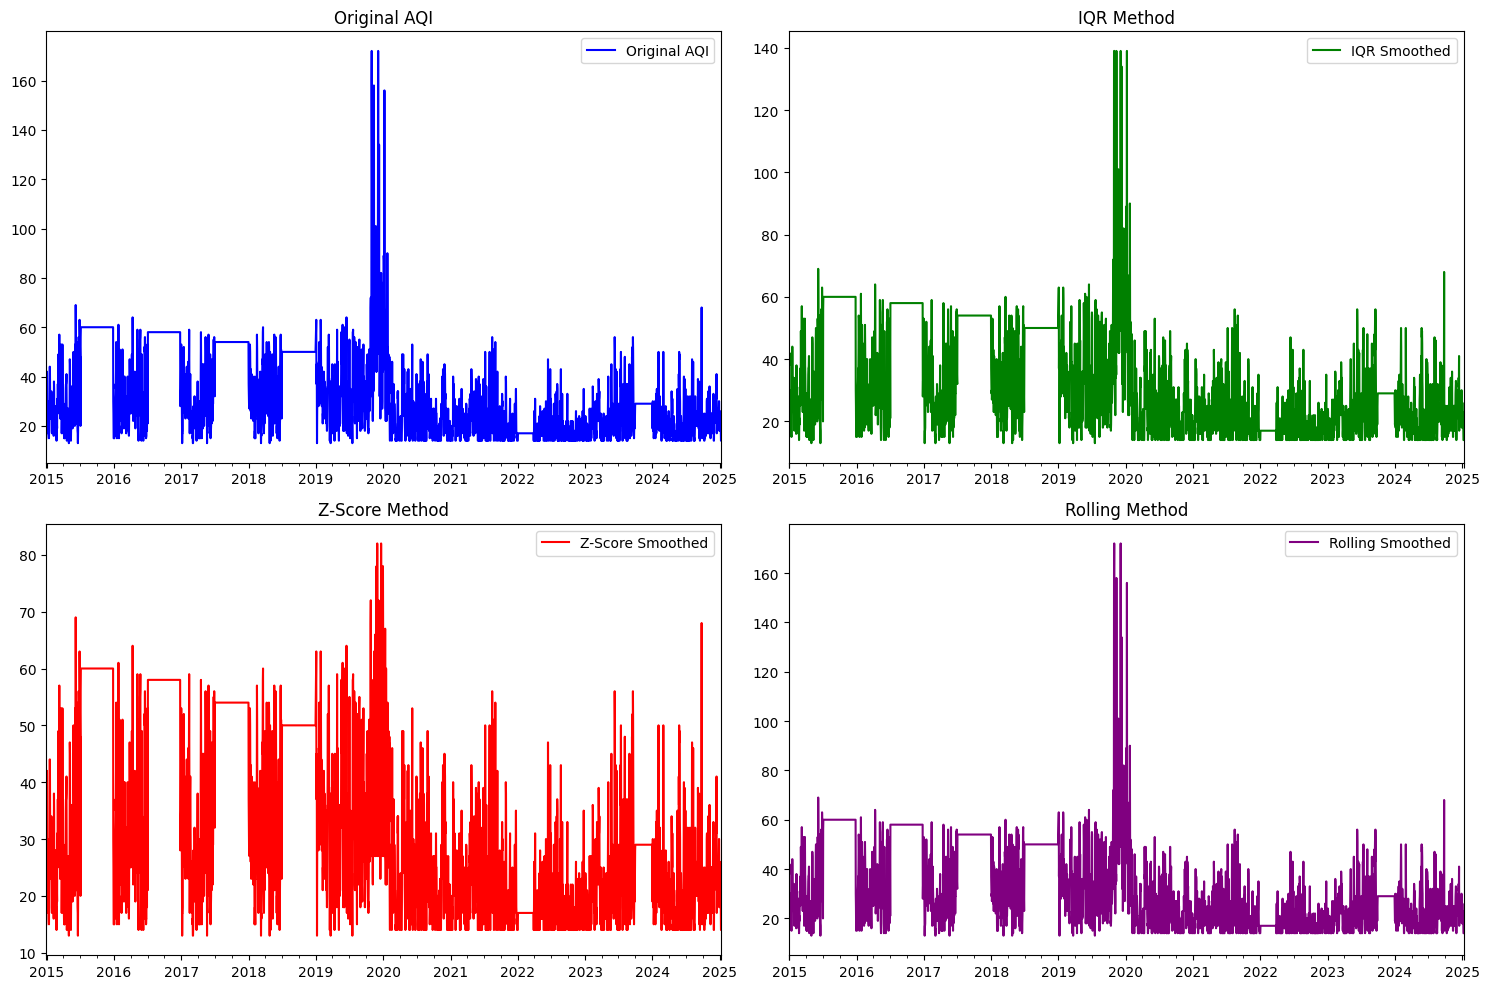

In [21]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot original AQI
new_data4['AQI'].plot(
    ax=axes[0, 0], 
    title='Original AQI', 
    color='blue', 
    label='Original AQI'
)
axes[0, 0].legend()

# Plot IQR Method smoothed AQI
new_data4['AQI_smoothed_iqr'].plot(
    ax=axes[0, 1], 
    title='IQR Method', 
    color='green', 
    label='IQR Smoothed'
)
axes[0, 1].legend()

# Plot Z-Score Method smoothed AQI
new_data4['AQI_smoothed_zscore'].plot(
    ax=axes[1, 0], 
    title='Z-Score Method', 
    color='red', 
    label='Z-Score Smoothed'
)
axes[1, 0].legend()

# Plot Rolling Method smoothed AQI
new_data4['AQI_smoothed_rolling'].plot(
    ax=axes[1, 1], 
    title='Rolling Method', 
    color='purple', 
    label='Rolling Smoothed'
)
axes[1, 1].legend()


plt.tight_layout()
plt.show()

(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [22]:
new_smooth = fn.calculate_smooth_aqi(new_data3, columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2014-12-30,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2014-12-31,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2015-01-01,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2015-01-02,2.964491,3.466667,14.816667,24.000000,34.166667,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,34.166667


# **2.1. Splitting & Preprocessing the Raw Data(Normal AQI)**

Normal AQI

In [23]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0,15.0,15.0,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0,23.0,23.0,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0,39.0,39.0,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0,38.0,38.0,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0,42.0,42.0,42.0


In [24]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with Normal AQI***

In [25]:
data = new_data4.drop(['Country_City', 'Checks',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 
                       'AQI_smoothed_rolling'],axis=1)

In [26]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,42.0


In [27]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI'],
      dtype='object')
Index([], dtype='object')


In [28]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2932, 10) (2932,) (733, 10) (733,)


In [29]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **2.2. Model Training & Testing**

## **2.2.1. LinearRegression**

In [30]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [31]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.995331275763755
The r2 Accuracy on the test dataset prediction is:  0.9948381337124453

The RMSE  on the training dataset is:  1.1487534988956953
The RMSE  on the testing dataset is:  1.2008192876938473

The MAE  on the training dataset is:  0.6971392288871283
The MAE  on the testing dataset is:  0.7023485378895562

The MSE  on the training dataset is:  1.3196346012251023
The MSE  on the testing dataset is:  1.441966961697559


## **2.2.2.  KNeighborsRegressor**

In [32]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [33]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9973598543896987
The R2 score on the test dataset prediction is:  0.9909297797541584

The RMSE  on the training dataset is:  0.863856640119991
The RMSE  on the testing dataset is:  1.5917805589607514

The MAE  on the training dataset is:  0.5078444747612552
The MAE  on the testing dataset is:  0.8806275579809004

The MSE  on the training dataset is:  0.7462482946793997
The MSE  on the testing dataset is:  2.5337653478854025


## **2.2.3.  Random Forest Regressor**

In [34]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [35]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9995435895335459
The R2 score on the test dataset prediction is:  0.9963112492333184

The RMSE  on the training dataset is:  0.35917453110240566
The RMSE  on the testing dataset is:  1.0151119401441364

The MAE  on the training dataset is:  0.039870395634379274
The MAE  on the testing dataset is:  0.1313096862210095

The MSE  on the training dataset is:  0.12900634379263295
The MSE  on the testing dataset is:  1.0304522510231926


## **2.2.4.  Decision Tree regressor**

In [36]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [37]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9969330470779979

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  0.9256095664896082

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.13096862210095497

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  0.8567530695770805


## **2.2.5.  Support Vector Machine regressor**

In [38]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [39]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.8974923933941128
The R2 score on the test dataset prediction is:  0.9072166982438198

The RMSE on the training dataset is:  5.3827694966323305
The RMSE on the testing dataset is:  5.091071440489744

The MAE on the training dataset is:  3.9632738337369426
The MAE on the testing dataset is:  3.870216681763994

The MSE  on the training dataset is:  28.97420745387547
The MSE  on the testing dataset is:  25.919008412170317


## **2.2.6.  XGBoost Regressor**

In [40]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [41]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999987625068888
The R2 score on the test dataset prediction is:  0.9981333586203575

The RMSE on the training dataset is:  0.01870247706765454
The RMSE on the testing dataset is:  0.7221122696053701

The MAE on the training dataset is:  0.009324649508945938
The MAE on the testing dataset is:  0.11870223665953007

The MSE  on the training dataset is:  0.000349782648466144
The MSE  on the testing dataset is:  0.5214461299146188


## **2.2.7.  Neural Network Regressor**

In [42]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [43]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9952503727123728
The R2 score on the test dataset prediction is:  0.9943918753184677

The RMSE on the training dataset is:  1.1586639676810155
The RMSE on the testing dataset is:  1.251650594498178

The MAE on the training dataset is:  0.6854992226164989
The MAE on the testing dataset is:  0.7050679010971272

The MSE  on the training dataset is:  1.3425021900023135
The MSE  on the testing dataset is:  1.5666292107076425


# **3.1. Splitting & Preprocessing the Raw Data(Smoothed iqr)**

AQI Smoothed iqr

In [44]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0,15.0,15.0,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0,23.0,23.0,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0,39.0,39.0,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0,38.0,38.0,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0,42.0,42.0,42.0


In [45]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [46]:
data = new_data4.drop(['Country_City', 'Checks', 'AQI', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],axis=1)

In [47]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_smoothed_iqr
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,42.0


In [48]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_smoothed_iqr'],
      dtype='object')
Index([], dtype='object')


In [49]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_smoothed_iqr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2932, 10) (2932,) (733, 10) (733,)


In [50]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **3.2. Model Training & Testing**

## **3.2.1. LinearRegression**

In [51]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [52]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.9931928417969202
The r2 Accuracy on the test dataset prediction is:  0.9902797840757875

The RMSE  on the training dataset is:  1.3691049779272801
The RMSE  on the testing dataset is:  1.6149016010186281

The MAE  on the training dataset is:  0.8015042911910482
The MAE  on the testing dataset is:  0.8134377518210754

The MSE  on the training dataset is:  1.874448440585258
The MSE  on the testing dataset is:  2.6079071809725285


## **3.2.2.  KNeighborsRegressor**

In [53]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [54]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9974212508121292
The R2 score on the test dataset prediction is:  0.9915527606193302

The RMSE  on the training dataset is:  0.8426716430221295
The RMSE  on the testing dataset is:  1.5054471354925152

The MAE  on the training dataset is:  0.5017053206002728
The MAE  on the testing dataset is:  0.8615279672578445

The MSE  on the training dataset is:  0.7100954979536153
The MSE  on the testing dataset is:  2.2663710777626194


## **3.2.3.  Random Forest Regressor**

In [55]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [56]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9997420081580989
The R2 score on the test dataset prediction is:  0.9980551330293419

The RMSE  on the training dataset is:  0.26653657581708123
The RMSE  on the testing dataset is:  0.7223589520879936

The MAE  on the training dataset is:  0.036152796725784454
The MAE  on the testing dataset is:  0.11004092769440654

The MSE  on the training dataset is:  0.07104174624829468
The MSE  on the testing dataset is:  0.5218024556616643


## **3.2.4.  Decision Tree regressor**

In [57]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [58]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9974168863173031

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  0.8324916167451097

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.10914051841746249

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  0.6930422919508867


## **3.2.5.  Support Vector Machine regressor**

In [59]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [60]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.8937263686649852
The R2 score on the test dataset prediction is:  0.8989412212674365

The RMSE on the training dataset is:  5.409617866296017
The RMSE on the testing dataset is:  5.207090570079813

The MAE on the training dataset is:  4.009581177699853
The MAE on the testing dataset is:  3.9479332975440102

The MSE  on the training dataset is:  29.263965459349077
The MSE  on the testing dataset is:  27.11379220501411


## **3.2.6.  XGBoost Regressor**

In [61]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [62]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999987059222593
The R2 score on the test dataset prediction is:  0.9988284299654144

The RMSE on the training dataset is:  0.01887704499579252
The RMSE on the testing dataset is:  0.5606505292449767

The MAE on the training dataset is:  0.008750064636480271
The MAE on the testing dataset is:  0.10149664442991332

The MSE  on the training dataset is:  0.0003563428277731754
The MSE  on the testing dataset is:  0.3143290159426725


## **3.2.7.  Neural Network Regressor**

In [63]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [64]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9945672907313766
The R2 score on the test dataset prediction is:  0.9933302471852766

The RMSE on the training dataset is:  1.2231002633862662
The RMSE on the testing dataset is:  1.3377130948110962

The MAE on the training dataset is:  0.7792968545684331
The MAE on the testing dataset is:  0.789595749888263

The MSE  on the training dataset is:  1.4959742542955539
The MSE  on the testing dataset is:  1.7894763240290807


# **4.1. Splitting & Preprocessing the Raw Data(zscore)**

AQI smoothed zscore

In [65]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0,15.0,15.0,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0,23.0,23.0,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0,39.0,39.0,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0,38.0,38.0,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0,42.0,42.0,42.0


In [66]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [67]:
data = new_data4.drop(['Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_rolling'],axis=1)

In [68]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_smoothed_zscore
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,42.0


In [69]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_smoothed_zscore'],
      dtype='object')
Index([], dtype='object')


In [70]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_smoothed_zscore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2932, 10) (2932,) (733, 10) (733,)


In [71]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **4.2. Model Training & Testing**

## **4.2.1. LinearRegression**

In [72]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [73]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.8544452331608134
The r2 Accuracy on the test dataset prediction is:  0.8843283186935816

The RMSE  on the training dataset is:  5.8884456348967795
The RMSE  on the testing dataset is:  5.340356688032515

The MAE  on the training dataset is:  2.8171000882377006
The MAE  on the testing dataset is:  2.7340493224021127

The MSE  on the training dataset is:  34.67379199513494
The MSE  on the testing dataset is:  28.519409555413617


## **4.2.2.  KNeighborsRegressor**

In [74]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [75]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9962277493628529
The R2 score on the test dataset prediction is:  0.9911190877219279

The RMSE  on the training dataset is:  0.9479550043719264
The RMSE  on the testing dataset is:  1.4797403997831313

The MAE  on the training dataset is:  0.5008526603001364
The MAE  on the testing dataset is:  0.8512960436562074

The MSE  on the training dataset is:  0.898618690313779
The MSE  on the testing dataset is:  2.189631650750341


## **4.2.3.  Random Forest Regressor**

In [76]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [77]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9997664811132857
The R2 score on the test dataset prediction is:  0.9980620853419084

The RMSE  on the training dataset is:  0.2358568310386887
The RMSE  on the testing dataset is:  0.6912323652798444

The MAE  on the training dataset is:  0.028560709413369717
The MAE  on the testing dataset is:  0.09852660300136426

The MSE  on the training dataset is:  0.05562844474761255
The MSE  on the testing dataset is:  0.47780218281036824


## **4.2.4.  Decision Tree regressor**

In [78]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [79]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9984672818062144

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  0.6147349388317406

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.08049113233287858

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  0.37789904502046384


## **4.2.5.  Support Vector Machine regressor**

In [80]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [81]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.6794164907706325
The R2 score on the test dataset prediction is:  0.756788309408054

The RMSE on the training dataset is:  8.738925613251157
The RMSE on the testing dataset is:  7.743707928116468

The MAE on the training dataset is:  4.502347353622158
The MAE on the testing dataset is:  4.17773242822227

The MSE  on the training dataset is:  76.3688208739371
The MSE  on the testing dataset is:  59.96501247597384


## **4.2.6.  XGBoost Regressor**

In [82]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [83]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999989025497232
The R2 score on the test dataset prediction is:  0.9986730071285584

The RMSE on the training dataset is:  0.016168877827354655
The RMSE on the testing dataset is:  0.5719934239076157

The MAE on the training dataset is:  0.007297073184712034
The MAE on the testing dataset is:  0.1003376465051919

The MSE  on the training dataset is:  0.000261432610195921
The MSE  on the testing dataset is:  0.32717647699355734


## **4.2.7.  Neural Network Regressor**

In [84]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [85]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.8510344479881696
The R2 score on the test dataset prediction is:  0.8834702486248643

The RMSE on the training dataset is:  5.957038109622662
The RMSE on the testing dataset is:  5.360127877138262

The MAE on the training dataset is:  2.8700270430249617
The MAE on the testing dataset is:  2.735224183198011

The MSE  on the training dataset is:  35.48630303949674
The MSE  on the testing dataset is:  28.730970859274727


# **5.1. Splitting & Preprocessing the Raw Data(AQI_smoothed_rolling)**

AQI_smoothed_rolling

In [86]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0,15.0,15.0,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0,23.0,23.0,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0,39.0,39.0,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0,38.0,38.0,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0,42.0,42.0,42.0


In [87]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [88]:
data = new_data4.drop([ 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore'],axis=1)

In [89]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_smoothed_rolling
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,42.0


In [90]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_smoothed_rolling'],
      dtype='object')
Index([], dtype='object')


In [91]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_smoothed_rolling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2932, 10) (2932,) (733, 10) (733,)


In [92]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **5.2. Model Training & Testing**

## **5.2.1. LinearRegression**

In [93]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [94]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.995331275763755
The r2 Accuracy on the test dataset prediction is:  0.9948381337124453

The RMSE  on the training dataset is:  1.1487534988956953
The RMSE  on the testing dataset is:  1.2008192876938473

The MAE  on the training dataset is:  0.6971392288871283
The MAE  on the testing dataset is:  0.7023485378895562

The MSE  on the training dataset is:  1.3196346012251023
The MSE  on the testing dataset is:  1.441966961697559


## **5.2.2.  KNeighborsRegressor**

In [95]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [96]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9973598543896987
The R2 score on the test dataset prediction is:  0.9909297797541584

The RMSE  on the training dataset is:  0.863856640119991
The RMSE  on the testing dataset is:  1.5917805589607514

The MAE  on the training dataset is:  0.5078444747612552
The MAE  on the testing dataset is:  0.8806275579809004

The MSE  on the training dataset is:  0.7462482946793997
The MSE  on the testing dataset is:  2.5337653478854025


## **5.2.3.  Random Forest Regressor**

In [97]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [98]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.9996888281909693
The R2 score on the test dataset prediction is:  0.9962426198129007

The RMSE  on the training dataset is:  0.29657043776583064
The RMSE  on the testing dataset is:  1.0245115297000826

The MAE  on the training dataset is:  0.0367462482946794
The MAE  on the testing dataset is:  0.13488403819918146

The MSE  on the training dataset is:  0.08795402455661644
The MSE  on the testing dataset is:  1.0496238744884034


## **5.2.4.  Decision Tree regressor**

In [99]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [100]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9909798375048758

The RMSE  on the training dataset is:  0.0
The RMSE  on the testing dataset is:  1.5873820330856605

The MAE  on the training dataset is:  0.0
The MAE  on the testing dataset is:  0.15143246930422918

The MSE  on the training dataset is:  0.0
The MSE  on the testing dataset is:  2.519781718963165


## **5.2.5.  Support Vector Machine regressor**

In [101]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [102]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.8974923933941128
The R2 score on the test dataset prediction is:  0.9072166982438198

The RMSE on the training dataset is:  5.3827694966323305
The RMSE on the testing dataset is:  5.091071440489744

The MAE on the training dataset is:  3.9632738337369426
The MAE on the testing dataset is:  3.870216681763994

The MSE  on the training dataset is:  28.97420745387547
The MSE  on the testing dataset is:  25.919008412170317


## **5.2.6.  XGBoost Regressor**

In [103]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [104]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999987625068888
The R2 score on the test dataset prediction is:  0.9981333586203575

The RMSE on the training dataset is:  0.01870247706765454
The RMSE on the testing dataset is:  0.7221122696053701

The MAE on the training dataset is:  0.009324649508945938
The MAE on the testing dataset is:  0.11870223665953007

The MSE  on the training dataset is:  0.000349782648466144
The MSE  on the testing dataset is:  0.5214461299146188


## **5.2.7.  Neural Network Regressor**

In [105]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [106]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9951973445481734
The R2 score on the test dataset prediction is:  0.9946753241171059

The RMSE on the training dataset is:  1.1651140821061556
The RMSE on the testing dataset is:  1.2196096957589972

The MAE on the training dataset is:  0.6922409204067184
The MAE on the testing dataset is:  0.6998705007744287

The MSE  on the training dataset is:  1.3574908243220694
The MSE  on the testing dataset is:  1.4874478099893538


# **6.1. Splitting & Preprocessing the Raw Data**

(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [107]:
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2014-12-30,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2014-12-31,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2015-01-01,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2015-01-02,2.964491,3.466667,14.816667,24.000000,34.166667,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,34.166667


In [108]:
new_smooth.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'AQI_Smooth'],
      dtype='object')

***Working with AQI_smoothed_iqr***

In [109]:
data = new_smooth.drop(['Country_City'],axis=1)

In [110]:
data.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,AQI_Smooth
2014-12-29,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,32.000000
2014-12-30,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,32.000000
2014-12-31,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,32.000000
2015-01-01,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,32.000000
2015-01-02,2.964491,3.466667,14.816667,24.000000,34.166667,1.966667,76.126377,1017.086884,18.027986,3.545607,34.166667


In [111]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'AQI_Smooth'],
      dtype='object')
Index([], dtype='object')


In [112]:
X = data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed']]

y = data['AQI_Smooth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2932, 10) (2932,) (733, 10) (733,)


In [113]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 
                                'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# **6.2. Model Training & Testing**

## **6.2.1. LinearRegression**

In [114]:
# training with LinearRegression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lm)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [115]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_lm))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.9988762416029494
The r2 Accuracy on the test dataset prediction is:  0.9991095052912659

The RMSE  on the training dataset is:  0.5017093952213822
The RMSE  on the testing dataset is:  0.4477365376688324

The MAE  on the training dataset is:  0.274953137915057
The MAE  on the testing dataset is:  0.25577240180500205

The MSE  on the training dataset is:  0.25171231725340515
The MSE  on the testing dataset is:  0.2004680071636738


## **6.2.2.  KNeighborsRegressor**

In [116]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', neigh)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [117]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_knn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.9979676668960807
The R2 score on the test dataset prediction is:  0.9948211506862064

The RMSE  on the training dataset is:  0.6747038752040818
The RMSE  on the testing dataset is:  1.079750719989159

The MAE  on the training dataset is:  0.42387272413560323
The MAE  on the testing dataset is:  0.6660650683428141

The MSE  on the training dataset is:  0.45522531921540516
The MSE  on the testing dataset is:  1.165861617317107


## **6.2.3.  Random Forest Regressor**

In [118]:
# Training with random forest regressor
random = RandomForestRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', random)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [119]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_random))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.999935302374378
The R2 score on the test dataset prediction is:  0.9996523315749265

The RMSE  on the training dataset is:  0.12038154980574083
The RMSE  on the testing dataset is:  0.2797624934375777

The MAE  on the training dataset is:  0.01590013706605905
The MAE  on the testing dataset is:  0.036933750531350194

The MSE  on the training dataset is:  0.01449171753363206
The MSE  on the testing dataset is:  0.07826705273441072


## **6.2.4.  Decision Tree regressor**

In [120]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [121]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_dt))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  1.0
The R2 score on the test dataset prediction is:  0.9992543924553693

The RMSE  on the training dataset is:  2.367238515717083e-15
The RMSE  on the testing dataset is:  0.40969627174835915

The MAE  on the training dataset is:  1.0814450744643407e-15
The MAE  on the testing dataset is:  0.05132139534929691

The MSE  on the training dataset is:  5.603818190294418e-30
The MSE  on the testing dataset is:  0.16785103508450533


## **6.2.5.  Support Vector Machine regressor**

In [122]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='linear')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [123]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_svr))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_svr))

The R2 score on the training dataset prediction is:  0.9207712234008976
The R2 score on the test dataset prediction is:  0.9230657485474713

The RMSE on the training dataset is:  4.21266800091349
The RMSE on the testing dataset is:  4.1616612932598605

The MAE on the training dataset is:  3.1224744902242794
The MAE on the testing dataset is:  3.1153742502187596

The MSE  on the training dataset is:  17.746571685920454
The MSE  on the testing dataset is:  17.319424719817334


## **6.2.6.  XGBoost Regressor**

In [124]:
# Training with XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb_regressor)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [125]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_xgb))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.9999964637715734
The R2 score on the test dataset prediction is:  0.9994999163576812

The RMSE on the training dataset is:  0.028144005981225472
The RMSE on the testing dataset is:  0.33552755292250036

The MAE on the training dataset is:  0.0169450034831701
The MAE on the testing dataset is:  0.08782131577908157

The MSE  on the training dataset is:  0.0007920850726712552
The MSE  on the testing dataset is:  0.1125787387701613


## **6.2.7.  Neural Network Regressor**

In [126]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', nn)])

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Predict on the training and test datasets
y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [127]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

print("")
# The Mean Squared Error (MSE)
print('The MSE  on the training dataset is: ',mean_squared_error(y_train, y_pred_train_nn))
print('The MSE  on the testing dataset is: ',mean_squared_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.9992687537876884
The R2 score on the test dataset prediction is:  0.9994601649754951

The RMSE on the training dataset is:  0.4047133903466778
The RMSE on the testing dataset is:  0.3486080359245625

The MAE on the training dataset is:  0.2505906730859179
The MAE on the testing dataset is:  0.23221261872944093

The MSE  on the training dataset is:  0.16379292832590242
The MSE  on the testing dataset is:  0.12152756271118106
